<a href="https://colab.research.google.com/github/edelangelmz/Inteligencia-Artificial/blob/main/PLN/Traductor_LN_PDDL_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lectura del dataset

In [276]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
filename = '/content/drive/My Drive/Colab Notebooks/Datasets/LN2PDDL.txt'

with open(filename) as file:
  dataset = file.readlines()

  print(len(dataset))
  print(dataset[7])

1005
ambulancia se encuentra en	ambulancia-en-localizacion



In [278]:
# Preprocesamiento de los datos
def preprocess_text(text):
  text = text.replace('\n', '')
  text = text.replace('á', 'a')
  text = text.replace('é', 'e')
  text = text.replace('í', 'i')
  text = text.replace('ó', 'o')
  text = text.replace('ú', 'u')
  text = text.replace(',', '')

  return text

def preprocess_code_input(code):
  code = code.replace('\n', '')
  code = code.replace('é', 'e')
  code = code.replace('í', 'i')
  code = code.replace('ó', 'o')
  code = code.replace('á', 'a')
  code = code.replace('ú', 'u')
  code = code.replace(',', '')
  code = code.replace('-', ' - ')
  code = code.replace('  ', ' ')

  return code

def preprocess_code_output(code):
  code = code.replace(' - ', '-')
  code = code.replace('\n', '')

  return code

In [279]:
# Crear 'tokens'
source_tokens = []
target_tokens = []

# Extracción del dataset
for element in dataset:
  element = element.split('\t')
  element[0] = preprocess_text(element[0])
  element[1] = preprocess_code_output(element[1])
  source_tokens.append(element[0].split(' '))
  target_tokens.append(element[1].split(' '))

print(source_tokens[7])
print(target_tokens[7])

['ambulancia', 'se', 'encuentra', 'en']
['ambulancia-en-localizacion']


In [280]:
def build_token_dict(token_list):
  token_dict = {
      '<PAD>': 0,
      '<START>': 1,
      '<END>': 2
  }

  for tokens in token_list:
    for token in tokens:
      if token not in token_dict:
        token_dict[token] = len(token_dict)

  return token_dict

In [281]:
source_token_dict = build_token_dict(source_tokens)
target_token_dict = build_token_dict(target_tokens)
target_token_dict_inv = {v:k for k,v in target_token_dict.items()}

#for key, value in target_token_dict.items():
#  target_token_dict_inv[value] = key

print(source_token_dict)
print(target_token_dict)
print(target_token_dict_inv)

{'<PAD>': 0, '<START>': 1, '<END>': 2, 'algunos': 3, 'tipos': 4, 'ambulancia': 5, 'esta': 6, 'en': 7, 'una': 8, 'localizacion': 9, 'llena': 10, 'cuando': 11, 'lleva': 12, 'un': 13, 'paciente': 14, 'tiene': 15, 'se': 16, 'encuentra': 17, 'vacia': 18, 'diferentes': 19, 'dos': 20, 'localizaciones': 21, 'pacientes': 22, 'efecto': 23, 'el': 24, 'es': 25, 'que': 26, 'este': 27, 'la': 28, 'actual': 29, 'exista': 30, 'cambie': 31, 'de': 32, 'pasa': 33, 'a': 34, 'estar': 35, 'mueva': 36, 'sera': 37, 'hospital': 38, 'empieza': 39, 'uno': 40, 'localiza': 41, 'movimiento': 42, 'cuatro': 43, 'tres': 44, 'tipo': 45, 'problema': 46, 'existe': 47, 'existen': 48, 'hay': 49, 'localizado': 50, 'sobre': 51, 'abulancia': 52, 'La': 53, 'precondicion': 54, 'debe': 55, 'misma': 56, 'encuentre': 57, 'ubique': 58, 'las': 59, '"los': 60, 'objetos': 61, 'son': 62, 'y': 63, 'hospital"': 64, 'los': 65, 'parametros': 66, 'ambulancia"': 67, 'mover': 68, 'moverse': 69, 'entre': 70, 'mueve': 71, 'no': 72, 'objeto': 73,

In [282]:
# Agregar <PAD>, <START> y <END> a cada frase del set de entrenamiento
encoder_tokens = [['<START>'] + tokens + ['<END>'] for tokens in source_tokens]
decoder_tokens = [['<START>'] + tokens + ['<END>'] for tokens in target_tokens]
output_tokens = [tokens + ['<END>'] for tokens in target_tokens]

#encoder_tokens = []
#for tokens in source_tokens:
#  encoder_tokens.append(['<START>'] + tokens + ['<END>'])

source_max_len = max(map(len, encoder_tokens))
target_max_len = max(map(len, decoder_tokens))

encoder_tokens = [tokens + ['<PAD>'] * (source_max_len - len(tokens)) for tokens in encoder_tokens]
decoder_tokens = [tokens + ['<PAD>'] * (target_max_len - len(tokens)) for tokens in decoder_tokens]
output_tokens = [tokens + ['<PAD>'] * (target_max_len - len(tokens)) for tokens in output_tokens]

print(encoder_tokens[120])
print(decoder_tokens[120])
print(output_tokens[120])

['<START>', 'paciente', 'dos', 'esta', 'en', 'la', 'localizacion', 'cuatro', '<END>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['<START>', 'paciente-en-localizacion', 'localizacion4', 'paciente2', '<END>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['paciente-en-localizacion', 'localizacion4', 'paciente2', '<END>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


In [283]:
encoder_input = [list(map(lambda x: source_token_dict[x], tokens)) for tokens in encoder_tokens]
decoder_input = [list(map(lambda x: target_token_dict[x], tokens)) for tokens in decoder_tokens]
output_input = [list(map(lambda x: [target_token_dict[x]], tokens)) for tokens in output_tokens]

#encoder_input = []
#for tokens in encoder_tokens:
#  temp = []
#  for token in tokens:
#    temp.append(source_token_dict[token])
#  encoder_input.append(temp)

print(encoder_input[120])
print(decoder_input[120])
print(output_input[120])

[1, 14, 20, 6, 7, 28, 9, 43, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 22, 33, 35, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[22], [33], [35], [2], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [284]:
pip install keras_transformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [285]:
# Crear la red neuronal
from keras_transformer import get_model, decode
import numpy as np

# Establecer una semilla inicial
np.random.seed(0)

In [286]:
model = get_model(
    token_num = max(len(source_token_dict), len(target_token_dict)),
    embed_dim = 32,
    encoder_num = 2,
    decoder_num = 2,
    head_num = 4,
    hidden_dim = 128,
    dropout_rate = 0.02,
    use_same_embed = False
)

model.compile('adam', 'sparse_categorical_crossentropy')
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Encoder-Input (InputLayer)     [(None, None)]       0           []                               
                                                                                                  
 Encoder-Token-Embedding (Embed  [(None, None, 32),  2464        ['Encoder-Input[0][0]']          
 dingRet)                        (77, 32)]                                                        
                                                                                                  
 Encoder-Embedding (TrigPosEmbe  (None, None, 32)    0           ['Encoder-Token-Embedding[0][0]']
 dding)                                                                                           
                                                                                           

In [287]:
# Entrenamiento
x = [np.array(encoder_input), np.array(decoder_input)]
y = np.array(output_input)

filename = "/content/drive/My Drive/Models/english-spanish.h5"

history = model.fit(x, y, validation_split = 0.8, epochs = 100, batch_size = 32)
model.save(filename)

model.load_weights(filename)

Epoch 1/100
7/7 [==============================] - 25s 581ms/step - loss: 0.9707 - val_loss: 0.9263
Epoch 2/100
7/7 [==============================] - 1s 110ms/step - loss: 0.9100 - val_loss: 0.8808
Epoch 3/100
7/7 [==============================] - 1s 117ms/step - loss: 0.8647 - val_loss: 0.8366
Epoch 4/100
7/7 [==============================] - 1s 111ms/step - loss: 0.8221 - val_loss: 0.7960
Epoch 5/100
7/7 [==============================] - 1s 114ms/step - loss: 0.7830 - val_loss: 0.7603
Epoch 6/100
7/7 [==============================] - 1s 109ms/step - loss: 0.7495 - val_loss: 0.7305
Epoch 7/100
7/7 [==============================] - 1s 112ms/step - loss: 0.7223 - val_loss: 0.7069
Epoch 8/100
7/7 [==============================] - 1s 151ms/step - loss: 0.7009 - val_loss: 0.6881
Epoch 9/100
7/7 [==============================] - 1s 115ms/step - loss: 0.6830 - val_loss: 0.6752
Epoch 10/100
7/7 [==============================] - 1s 111ms/step - loss: 0.6702 - val_loss: 0.6606
Epoch 11

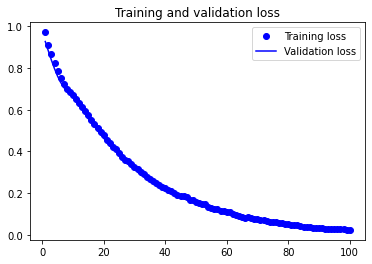

In [288]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [289]:
def translate(sentence):
  sentence = preprocess_text(sentence)
  sentence_tokens = ['<START>'] + sentence.split(' ') + ['<END>', '<PAD>']
  sentence_tokens = sentence_tokens + ['<PAD>'] * (max(source_max_len, target_max_len) - len(sentence_tokens))

  tr_input = list(map(lambda x: source_token_dict[x], [tokens for tokens in sentence_tokens]))

  decoded = decode(
      model,
      tr_input,
      start_token = target_token_dict['<START>'],
      end_token = target_token_dict['<END>'],
      pad_token = target_token_dict['<PAD>']
  )

  code = ' '.join(map(lambda x: target_token_dict_inv[x], decoded[1:-1]))
  code = preprocess_code_output(code)

  return code

In [290]:
# Calcular la exactitud [Correctas/Pruebas]
import random

x = []
y = []

validation_set = random.sample(dataset, int(len(dataset) * 0.2))
for element in validation_set:
  element = element.split('\t')
  x.append(preprocess_text(element[0]))
  y.append(preprocess_text(element[1]))

x= list(map(lambda element: translate(element), x))

print(x)
print(y)

result = list(map(lambda a, b: a == b, x, y))

count = 0
for e in result:
  if e == True:
    count = count + 1

print(count)
print(len(result))

exactitud = round(count / len(result), 2)
print("La exactitud es de: {}".format(exactitud))

['effect ( and ( ambulancia-en-localizacion ?localizacion ?ambulancia ) ( paciente-en-localizacion ?localizacion ?paciente ) )', 'paciente-en-localizacion', 'paciente-en-localizacion', 'paciente-en-localizacion', 'paciente-en-localizacion', 'effect ( and ( ambulancia-en-localizacion ?localizacion1 ?ambulancia ) ) ( ambulancia-en-localizacion ?localizacion2 ?ambulancia ) ( ir ?localizacion2 ?localizacion1 )', 'ir ?localizacion1 -localizacionocalizacion ?localizacion2-localizacion', 'paciente1 paciente2-paciente', 'effect (and ( not ( llena-ambulancia ?paciente ) ) ( ambulancia-vacia ) )', 'paciente', 'paciente-en-localizacion', 'ir ?localizacion1 -localizacionocalizacion ?localizacion2-localizacion', 'hospital-en-localizacion', 'ir', 'paciente-en-localizacion localizacion4 paciente2', '?paciente-paciente', 'localizacion3', 'en', 'paciente-en-localizacion', 'precondition ( and ( ambulancia-vacia ) ( ambulancia-en-localizacion ?localizacion ?ambulancia ) )', 'localizacion1 localizacion2 l

In [291]:
translate('el paciente se encuentra en localización')

'paciente-en-localizacion'